In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mutual_info_score

In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


## Data preparation

- Check if the missing values are presented in the features.
- If there are missing values:
- For categorical features, replace them with 'NA'
- For numerical features, replace with with 0.0

In [114]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [115]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [116]:
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'converted']
categorical = df.columns.difference(numerical).tolist()

In [117]:
categorical

['employment_status', 'industry', 'lead_source', 'location']

In [118]:
df[categorical] = df[categorical].fillna('NA')

In [119]:
df[categorical].isnull().sum()

employment_status    0
industry             0
lead_source          0
location             0
dtype: int64

In [120]:
df[numerical] = df[numerical].fillna(0.0)

In [121]:
df[numerical].isnull().sum()

number_of_courses_viewed    0
annual_income               0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

# Question 1

What is the most frequent observation (mode) for the column industry?

NA
technology
healthcare
retail

In [122]:
df.industry.mode()

0    retail
Name: industry, dtype: object

In [123]:
df["industry"].value_counts().idxmax()

'retail'

# Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

interaction_count and lead_score
number_of_courses_viewed and lead_score
number_of_courses_viewed and interaction_count
annual_income and interaction_count
Only consider the pairs above when answering this question

In [124]:
df[numerical].corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879,0.435914
annual_income,0.009770,1.000000,0.027036,0.015610,0.053131
interaction_count,-0.023565,0.027036,1.000000,0.009888,0.374573
lead_score,-0.004879,0.015610,0.009888,1.000000,0.193673
converted,0.435914,0.053131,0.374573,0.193673,1.000000


In [125]:
import seaborn as sns

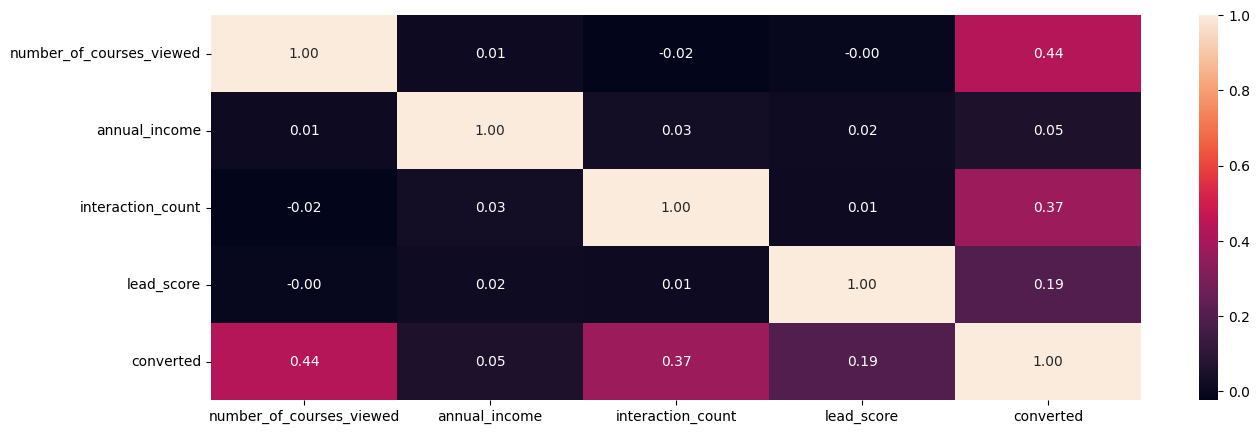

In [126]:
plt.figure(figsize=(15, 5))
sns.heatmap(df[numerical].corr(), annot=True, fmt=".2f")
plt.show()

# Split the data
Split your data in train/val/test sets with 60%/20%/20% distribution.
Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
Make sure that the target value converted is not in your dataframe.

In [127]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [128]:
df_full_train

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
1066,social_media,manufacturing,2,44403.0,self_employed,australia,1,0.71,0
638,events,retail,3,38048.0,student,north_america,6,0.97,1
799,social_media,education,2,71399.0,NA,europe,1,0.51,1
380,referral,education,2,47912.0,employed,australia,1,0.04,0
303,paid_ads,healthcare,1,34806.0,employed,europe,4,0.32,1
...,...,...,...,...,...,...,...,...,...
1130,events,manufacturing,1,57039.0,employed,south_america,2,0.30,0
1294,events,healthcare,2,56185.0,student,south_america,2,0.44,0
860,paid_ads,manufacturing,1,56402.0,student,north_america,1,0.02,0
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02,1


In [129]:
len(df), len(df_full_train), len(df_train), len(df_val), len(df_test)

(1462, 1169, 876, 293, 293)

In [130]:
df_train

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
1077,paid_ads,retail,0,58472.0,student,middle_east,5,0.03,0
463,organic_search,manufacturing,3,71738.0,student,middle_east,6,0.77,1
842,paid_ads,technology,3,81973.0,employed,north_america,2,0.59,1
835,NA,technology,1,74956.0,employed,europe,3,0.34,1
837,organic_search,retail,3,59335.0,student,australia,1,0.98,1
...,...,...,...,...,...,...,...,...,...
725,organic_search,other,1,43907.0,employed,australia,4,0.33,1
401,social_media,retail,3,64969.0,employed,north_america,1,0.18,0
957,NA,education,3,89042.0,employed,asia,4,0.75,1
992,social_media,manufacturing,1,0.0,self_employed,europe,1,0.65,0


In [131]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [132]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values
y_full_train = df_full_train.converted.values

In [133]:
del df_train['converted']
del df_val['converted']
del df_test['converted'] 
del df_full_train['converted']

In [134]:
df_train

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,paid_ads,retail,0,58472.0,student,middle_east,5,0.03
1,organic_search,manufacturing,3,71738.0,student,middle_east,6,0.77
2,paid_ads,technology,3,81973.0,employed,north_america,2,0.59
3,NA,technology,1,74956.0,employed,europe,3,0.34
4,organic_search,retail,3,59335.0,student,australia,1,0.98
...,...,...,...,...,...,...,...,...
871,organic_search,other,1,43907.0,employed,australia,4,0.33
872,social_media,retail,3,64969.0,employed,north_america,1,0.18
873,NA,education,3,89042.0,employed,asia,4,0.75
874,social_media,manufacturing,1,0.0,self_employed,europe,1,0.65


# Question 3
Calculate the mutual information score between converted and other categorical variables in the dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).
Which of these variables has the biggest mutual information score?

industry
location
lead_source
employment_status


In [135]:
def mutual_info_score_series(series):
    return mutual_info_score(series, y_train)

In [136]:
mi = df_train[categorical].apply(mutual_info_score_series)
mi.sort_values(ascending=False).round(2)

lead_source          0.04
employment_status    0.01
industry             0.01
location             0.00
dtype: float64

Question 4
Now let's train a logistic regression.

Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
Fit the model on the training dataset.
To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters: - model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

0.64
0.74
0.84
0.94

In [139]:
train_dicts = df_train.to_dict(orient='records')
train_dicts[0]

{'lead_source': 'paid_ads',
 'industry': 'retail',
 'number_of_courses_viewed': 0,
 'annual_income': 58472.0,
 'employment_status': 'student',
 'location': 'middle_east',
 'interaction_count': 5,
 'lead_score': 0.03}

In [140]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_train.shape

(876, 31)

In [141]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_score', 'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

In [142]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)
X_val.shape

(293, 31)

In [143]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [144]:
model.coef_[0].round(3)

array([-0.   , -0.015,  0.034,  0.003,  0.012, -0.103, -0.025,  0.049,
       -0.02 , -0.013, -0.003, -0.009, -0.032, -0.016,  0.311,  0.051,
        0.02 , -0.012, -0.012, -0.115,  0.08 , -0.03 ,  0.004, -0.011,
       -0.011, -0.006,  0.008,  0.006, -0.033, -0.025,  0.454])

In [146]:
model.intercept_[0]

np.float64(-0.06914728027824993)

In [148]:
model.predict_proba(X_train)

array([[0.42085658, 0.57914342],
       [0.12716509, 0.87283491],
       [0.41183895, 0.58816105],
       ...,
       [0.25265786, 0.74734214],
       [0.3302157 , 0.6697843 ],
       [0.14407824, 0.85592176]], shape=(876, 2))

In [149]:
y_pred = model.predict_proba(X_val)[:, 1]

In [ ]:
converted_pred = (y_pred >=0.5).astype(int)


In [157]:
accuracy = round((y_val == converted_pred).mean(), 2)
accuracy

np.float64(0.7)

In [159]:
accuracy = (y_val == converted_pred).mean()
accuracy

np.float64(0.6996587030716723)

Question 5
Let's find the least useful feature using the feature elimination technique.
Train a model using the same features and parameters as in Q4 (without rounding).
Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

'industry'
'employment_status'
'lead_score'
Note: The difference doesn't have to be positive.

In [161]:
col_to_del = ['industry', 'employment_status', 'lead_score']

results = {}

for col in col_to_del:
    current_cols = [c for c in df_train.columns if c != col]
    train_dicts_c = df_train[current_cols].to_dict(orient='records')
    dv_c = DictVectorizer(sparse=False)
    X_train_c = dv_c.fit_transform(train_dicts_c)
    val_dicts_c = df_val[current_cols].to_dict(orient='records')
    X_val_c = dv_c.transform(val_dicts_c)
    model_c = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_c.fit(X_train_c, y_train)
    y_pred_c = model_c.predict_proba(X_val_c)[:, 1]
    converted_pred_c = (y_pred_c >=0.5).astype(int)
    accuracy_c = (y_val == converted_pred_c).mean()
    difference =  accuracy - accuracy_c
    results[col] = {'accuracy': accuracy_c, 'difference': difference}

print(results)

{'industry': {'accuracy': np.float64(0.6996587030716723), 'difference': np.float64(0.0)}, 'employment_status': {'accuracy': np.float64(0.6962457337883959), 'difference': np.float64(0.0034129692832763903)}, 'lead_score': {'accuracy': np.float64(0.7064846416382252), 'difference': np.float64(-0.0068259385665528916)}}


In [162]:
min_key = min(results, key=lambda k: abs(results[k]['difference']))
print(f"Column : {min_key}")
print(f"Minimal absolute diff : {results[min_key]['difference']}")

Column : industry
Minimal absolute diff : 0.0


Question 6
Now let's train a regularized logistic regression.

Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].

Train models using all the features as in Q4.

Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these C leads to the best accuracy on the validation set?

0.01

0.1

1

10

100

Note: If there are multiple options, select the smallest C.

In [163]:
parameter = [0.01, 0.1, 1, 10, 100]

In [164]:
for p in parameter:
    model = LogisticRegression(solver='liblinear', C=p, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    converted_pred = (y_pred >=0.5).astype(int)
    accuracy = round((y_val == converted_pred).mean(),3)
    print(f"C={p} Accuracy={accuracy}")

C=0.01 Accuracy=0.7
C=0.1 Accuracy=0.7
C=1 Accuracy=0.7
C=10 Accuracy=0.7
C=100 Accuracy=0.7
